In [1]:
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
from lumicks import pylake
%matplotlib inline

In [2]:
%% bash
cd /mnt/d/ctrap/data/2019_05_17/10_nM_YOYO1_plus_minus_1mM_spermine/Markers_experiment_1

UsageError: Cell magic `%%` not found.


# FD curves

[Download this page as a Jupyter notebook](_downloads/6f57fb1b6e284fa9ce420e0488c35a31/fdcurves.ipynb)

The following code loads an HDF5 file and lists all of the FD curves inside of it:

In [3]:
#verify that what i expect to be in the file is there
from lumicks import pylake
filename = r'20190517-172557 Marker DNA 5 without dye.h5'
file = pylake.File(filename)
# print(file)

In [4]:
#next file that i want to look at

filename1 = r'20190517-172604 Marker DNA 5 with dye.h5'
file1 = pylake.File(filename1)
#print(file2)

In [6]:
#next file that i want to look at

filename2 = r'20190426-180841 FD Curve FD mark 27 1mM spermine after first pull.h5'
file2 = pylake.File(filename2)
#print(file2)

In [121]:
#next file that i want to look at

filename3 = r'20190426-180841 FD Curve FD mark 21 1mM spermine maybe 1 DNA  stagnant spermine.h5'
file3 = pylake.File(filename3)


In [122]:
#next file that i want to look at

filename4 = r'20190426-180841 FD Curve FD mark 22 1mM spermine repeat from DNA in mark 21  stagnant spermine.h5'
file4 = pylake.File(filename4)


In [111]:
#next file that i want to look at

filename5 = r'20190426-180841 FD Curve FD mark 7 1mM spermine subsequent subsequent.h5'
file5 = pylake.File(filename5)


To visualizes an FD curve, you can use the built-in `.plot_scatter()` function:

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

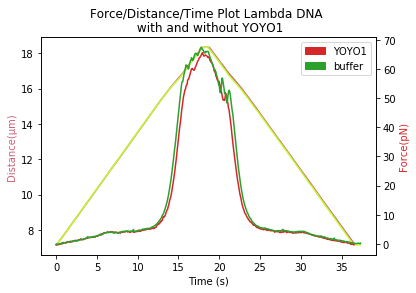

<Figure size 432x288 with 0 Axes>

In [5]:
# CROP time trace to include just extension and relaxation veclocity clamp data

import matplotlib.patches as mpatches

#determine cut-off for FD plots for start and stop of velocity-clamp
u1 = 4
u2 = 43
t1 = str(u1)+"s"
t2 = str(u2)+"s"
distance_data = file1["Distance"]["Distance 1"][t1 :t2].data
time = file1["Distance"]["Distance 1"][t1 :t2].timestamps 
time = (time - time[0]) * 1e-9
derivative_rounded = np.around(distance_data[1:]-distance_data[:-1],2)
first_occurr = np.where(derivative_rounded != 0)[0].min()
last_occurr = np.where(derivative_rounded != 0)[0].max()
first_time= time[first_occurr]
final_time= time[last_occurr]
first_time_s = str(first_time)+"s"
final_time_s =  str(final_time)+"s"

plt.figure()
#Plot distance versus time curve
fig, ax1 = plt.subplots()
distance = file1["Distance"]["Distance 1"][t1 :t2]
distance_data = distance[first_time_s :final_time_s].data
time = distance[first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'xkcd:rose'
ax1.set_ylabel('Distance(µm)',color=color)
ax1.set_xlabel("Time (s)")
ax1.plot(time,distance_data,color=color)

#Plot force versus time curve
force1xLF = file1["Force LF"]["Force 1x"][t1 :t2]
force_data = force1xLF[first_time_s :final_time_s].data
force_time = force1xLF[first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9
ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Force(pN)',color=color)
ax2.plot(force_time, force_data, color=color)
legend = mpatches.Patch(color=color, label='YOYO1')
plt.legend(handles=[legend])

u1 = 80
u2 = 120
t1 = str(u1)+"s"
t2 = str(u2)+"s"

#determine cut-off for FD plots for start and stop of velocity-clamp #2 
distance_data = file["Distance"]["Distance 1"][t1 :t2].data
time = file["Distance"]["Distance 1"][t1 :t2].timestamps 
time = (time - time[0]) * 1e-9
derivative_rounded = np.around(distance_data[1:]-distance_data[:-1],2)
first_occurr = np.where(derivative_rounded != 0)[0].min()
last_occurr = np.where(derivative_rounded != 0)[0].max()
first_time= time[first_occurr]
final_time= time[last_occurr]
first_time_s = str(first_time)+"s"
final_time_s =  str(final_time)+"s"

#Plot distance versus time curve #2 

distance = file["Distance"]["Distance 1"][t1 :t2]
distance_data = distance[first_time_s :final_time_s].data
time = distance[first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'xkcd:yellow green'
ax1.plot(time,distance_data,color=color)

#Plot force versus time curve #2 
force1xLF = file["Force LF"]["Force 1x"][t1 :t2]
force_data = force1xLF[first_time_s :final_time_s].data
force_time = force1xLF[first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9

color = 'tab:green'
ax2.plot(force_time, force_data, color=color)
legend2 = mpatches.Patch(color=color, label='buffer')

plt.title("Force/Distance/Time Plot Lambda DNA \n with and without YOYO1")
plt.legend(handles=[legend,legend2])
# plt.savefig("DNA 5 BEST same distance Force_Distance_Time Plot Lambda DNA with and without YOYO1",  bbox_inches="tight")
plt.figure()

In [194]:
import os
print(os.path)

<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>


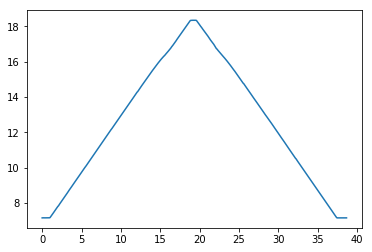

In [189]:
# distance = file["Distance"]["Distance 1"]
# distance_data = file["Distance"]["Distance 1"].data
# time = file["Distance"]["Distance 1"].timestamps 
# time = (time - time[0]) * 1e-9

u1 = 80
u2 = 120
t1 = str(u1)+"s"
t2 = str(u2)+"s"

distance = file["Distance"]["Distance 1"][t1: t2]
distance_data = file["Distance"]["Distance 1"][t1: t2].data
time = file["Distance"]["Distance 1"][t1: t2].timestamps 
time = (time - time[0]) * 1e-9

plt.plot(time,distance_data)

<Figure size 432x288 with 0 Axes>

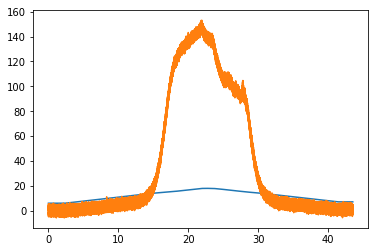

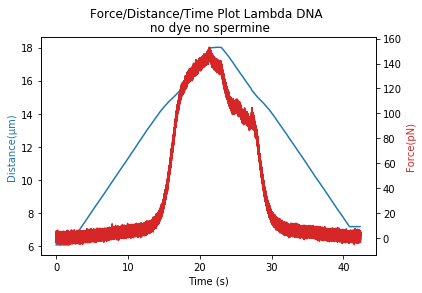

<Figure size 432x288 with 0 Axes>

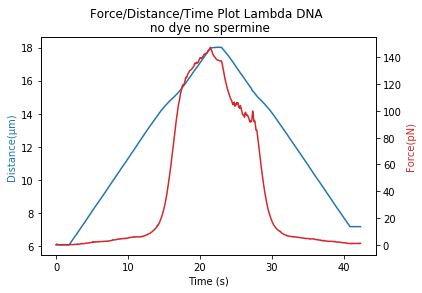

<Figure size 432x288 with 0 Axes>

In [169]:
#  manual visualization of the FD curves
# CROP time trace to include just extension and relaxation veclocity clamp data

# UnCropped Plot

u1 = 0
u2 = 60
t1 = str(u1)+"s"
t2 = str(u2)+"s"

plt.figure()
force1x = file["Force HF"]["Force 1x"][t1 :t2]
force_data = file["Force HF"]["Force 1x"][t1 :t2].data
force_time = file["Force HF"]["Force 1x"][t1 :t2].timestamps
force_time = (force_time - force_time[0]) * 1e-9

distance = file["Distance"]["Distance 1"][t1 :t2]
distance_data = file["Distance"]["Distance 1"][t1 :t2].data
time = file["Distance"]["Distance 1"][t1 :t2].timestamps 
time = (time - time[0]) * 1e-9

plt.plot(time,distance_data)
plt.plot(force_time, force_data)

# length_dis_data = len(distance_data)
# print(length_dis_data)
# length_dis_time = len(time)
# print(length_dis_time)
# length_force_time = len(force_time)
# print(length_force_time)
# length_force_data = len(force_data)
# print(length_force_data)


derivative_rounded = np.round(distance_data[1:]-distance_data[:-1],2)
first_occurr = np.where(derivative_rounded != 0)[0].min()
last_occurr = np.where(derivative_rounded != 0)[0].max()
# print(np.where(derivative_rounded != 0)[0][0])
# print(derivative_rounded != 0)
# print(derivative_rounded[derivative_rounded != 0])
# print(first_occurr)
# print(last_occurr)
# print("first time=",time[first_occurr],"s")
# print("final time=",time[last_occurr],"s")
first_time= time[first_occurr]
final_time= time[last_occurr]
first_time_s = str(first_time)+"s"
final_time_s =  str(final_time)+"s"
# print(first_time_s)
# print(final_time_s)

# Cropped Plot
fig, ax1 = plt.subplots()
# plt.plot(time[(first_occurr+1):(last_occurr+1)],distance_data[(first_occurr+1):(last_occurr+1)])

distance_data = file["Distance"]["Distance 1"][first_time_s :final_time_s].data
time = file["Distance"]["Distance 1"][first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'tab:blue'
ax1.set_ylabel('Distance(µm)',color=color)
ax1.set_xlabel("Time (s)")
ax1.plot(time,distance_data,color=color)

force_data = file["Force HF"]["Force 1x"][first_time_s :final_time_s].data
force_time = file["Force HF"]["Force 1x"][first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9

color = 'tab:red'
ax2 = ax1.twinx() 
ax2.set_ylabel('Force(pN)',color=color)
ax2.plot(force_time, force_data, color=color)

plt.title("Force/Distance/Time Plot Lambda DNA \n no dye no spermine")
# plt.savefig("DNA 5 downsampled Force_Distance_Time Plot Lambda DNA no dye no spermine",  bbox_inches="tight")

# first_occ_scaled = multiplier * first_occurr
# last_occ_scaled = multiplier * last_occurr
# plt.plot(force_time[first_occ_scaled:last_occ_scaled], force_data[first_occ_scaled:last_occ_scaled]

plt.figure()

fig, ax1 = plt.subplots()
# plt.plot(time[(first_occurr+1):(last_occurr+1)],distance_data[(first_occurr+1):(last_occurr+1)])

distance_data = file["Distance"]["Distance 1"][first_time_s :final_time_s].data
time = file["Distance"]["Distance 1"][first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'tab:blue'
ax1.set_ylabel('Distance(µm)',color=color)
ax1.set_xlabel("Time (s)")
ax1.plot(time,distance_data,color=color)

force_data = file["Force LF"]["Force 1x"][first_time_s :final_time_s].data
force_time = file["Force LF"]["Force 1x"][first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9

color = 'tab:red'
ax2 = ax1.twinx() 
ax2.set_ylabel('Force(pN)',color=color)
ax2.plot(force_time, force_data, color=color)

plt.title("Force/Distance/Time Plot Lambda DNA \n no dye no spermine")
plt.savefig("DNA 5 Low Frequency Force_Distance_Time Plot Lambda DNA no dye no spermine",  bbox_inches="tight")

# first_occ_scaled = multiplier * first_occurr
# last_occ_scaled = multiplier * last_occurr
# plt.plot(force_time[first_occ_scaled:last_occ_scaled], force_data[first_occ_scaled:last_occ_scaled]

plt.figure()
# sampling_rate = force1x.sample_rate
# final_sampling_rate = 100 #Hz
# force_100Hz = force1x.downsampled_by(int( sampling_rate / final_sampling_rate ))
# force_data_100Hz = force_100Hz[first_time_s :final_time_s].data
# force_time_100Hz = force_100Hz[first_time_s :final_time_s].timestamps
# force_time_100Hz = (force_time - force_time[0]) * 1e-9
# print(len(force_data_100Hz))
# print(len(force_time_100Hz))
# plt.plot(force_time_100Hz,force_data_100Hz)

# sampling_rate = force1x.sample_rate
# print(sampling_rate)
# final_sampling_rate = 100 #Hz
# force_100Hz = force1x.downsampled_by(int( sampling_rate / final_sampling_rate ))
# sampling_rate = force_100Hz.sample_rate
# print(final_sampling_rate)
# print(sampling_rate)
# force_100Hz.plot()

In [ ]:
plt.figure()
force1x = file1["Force HF"]["Force 1x"]['0s':'17.5s']
distance = file1["Distance"]["Distance 1"]['0s': '17.5s']
distance_data = file1["Distance"]["Distance 1"]['0s': '17.5s'].data
time = file1["Distance"]["Distance 1"]['0s': '17.5s'].timestamps 
time = (time - time[0]) * 1e-9
plt.plot(time,distance_data)
force1x.plot()

In [93]:
rate_dis = file["Distance"]["Distance 1"].sample_rate
print(rate_dis)
# The sampling rate of the distance data is dependent on bright field, and therefore not reportable like the force sampling rate which has a set frequency?
# Rather than using the sampling rate function, I will find the time at which the rate of change is not 0, and will use the time slicing function to cut the FD curves to the proper start and stop times 

None


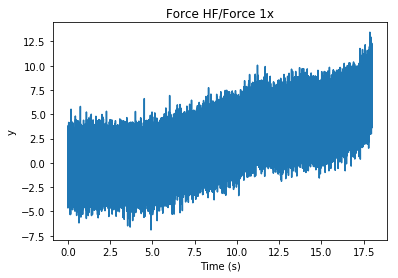

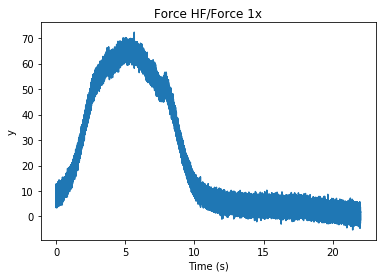

In [21]:
#sectioning
plt.figure()
force1x['0s':'18s'].plot()
plt.figure()
force1x['18s':'40s'].plot()

Here, `.fdcurves` is a standard Python dictionary, so we can do standard `dict` thing with it. For example, we can iterate over all the FD curve in a file and plot them:

In [ ]:
# I cannot use these functions yet since it seems i may have saved the file incorrectly 
#for name, fd in file.fdcurves.items():
#    fd.plot_scatter()
#    plt.savefig(name)

0.06666240000000001s
37.264281600000004s


Text(0.5,1,'Force/Distance/Time Plot Lambda DNA \n no dye no spermine')

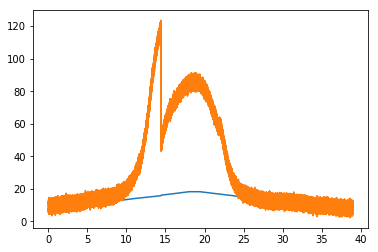

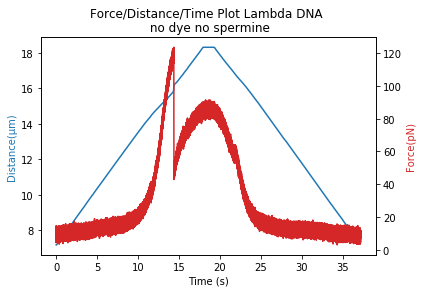

<Figure size 432x288 with 0 Axes>

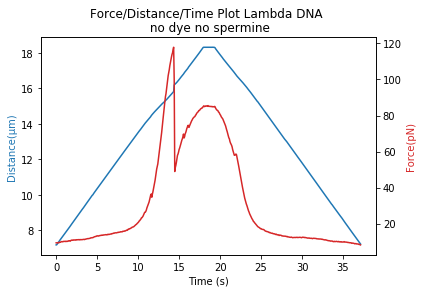

In [165]:
#  manual visualization of the FD curves
# CROP time trace to include just extension and relaxation veclocity clamp data

# UnCropped Plot
plt.figure()
force1x = file1["Force HF"]["Force 1x"]['4s':'43s']
force_data = file1["Force HF"]["Force 1x"]['4s':'43s'].data
force_time = file1["Force HF"]["Force 1x"]['4s':'43s'].timestamps
force_time = (force_time - force_time[0]) * 1e-9

distance = file1["Distance"]["Distance 1"]['4s':'43s']
distance_data = file1["Distance"]["Distance 1"]['4s':'43s'].data
time = file1["Distance"]["Distance 1"]['4s':'43s'].timestamps 
time = (time - time[0]) * 1e-9

plt.plot(time,distance_data)
plt.plot(force_time, force_data)

derivative_rounded = np.around(distance_data[1:]-distance_data[:-1],2)

first_occurr = np.where(derivative_rounded != 0)[0].min()
last_occurr = np.where(derivative_rounded != 0)[0].max()


# print(np.where(derivative_rounded != 0)[0][0])
# print(distance_data)
# print(derivative_rounded)
# print(derivative_rounded != 0)
# print(derivative_rounded[derivative_rounded != 0])
# print(first_occurr)
# print(last_occurr)
# print("length distance data =", len(distance_data))
# print("first time=",time[first_occurr],"s")
# print("final time=",time[last_occurr],"s")

first_time= time[first_occurr]
# first_time = first_time + 4
final_time= time[last_occurr]
# final_time = final_time + 43
first_time_s = str(first_time)+"s"
final_time_s =  str(final_time)+"s"

print(first_time_s)
print(final_time_s)

# Cropped Plot
fig, ax1 = plt.subplots()

# plt.plot(time[(first_occurr+1):(last_occurr+1)],distance_data[(first_occurr+1):(last_occurr+1)])

distance_data = distance[first_time_s :final_time_s].data
time = distance[first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'tab:blue'
ax1.set_ylabel('Distance(µm)',color=color)
ax1.set_xlabel("Time (s)")
ax1.plot(time,distance_data,color=color)

force_data = force1x[first_time_s :final_time_s].data
force_time = force1x[first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9

color = 'tab:red'
ax2 = ax1.twinx() 
ax2.set_ylabel('Force(pN)',color=color)
ax2.plot(force_time, force_data, color=color)

plt.title("Force/Distance/Time Plot Lambda DNA \n no dye no spermine")

# plt.savefig("DNA 5 downsampled Force_Distance_Time Plot Lambda DNA no dye no spermine",  bbox_inches="tight")

plt.figure()

fig, ax1 = plt.subplots()

distance = file1["Distance"]["Distance 1"]['4s':'43s']
distance_data = distance[first_time_s :final_time_s].data
time = distance[first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'tab:blue'
ax1.set_ylabel('Distance(µm)',color=color)
ax1.set_xlabel("Time (s)")
ax1.plot(time,distance_data,color=color)

force1xLF = file1["Force LF"]["Force 1x"]['4s':'43s']
force_data = force1xLF[first_time_s :final_time_s].data
force_time = force1xLF[first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9

color = 'tab:red'
ax2 = ax1.twinx() 
ax2.set_ylabel('Force(pN)',color=color)
ax2.plot(force_time, force_data, color=color)

plt.title("Force/Distance/Time Plot Lambda DNA \n no dye no spermine")


Text(0.5,1,'Force/Distance/Time Plot Lambda DNA \n no dye no spermine')

<Figure size 432x288 with 0 Axes>

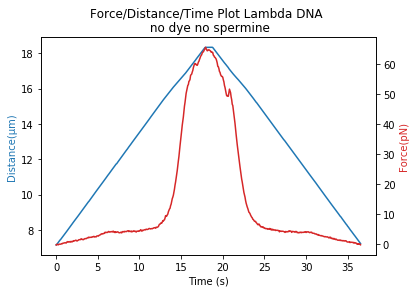

In [97]:
# CROP time trace to include just extension and relaxation veclocity clamp data


#determine cut-off for FD plots for start and stop of velocity-clamp
distance_data = file1["Distance"]["Distance 1"]['4s':'43s'].data
time = file1["Distance"]["Distance 1"]['4s':'43s'].timestamps 
time = (time - time[0]) * 1e-9
derivative_rounded = np.around(distance_data[1:]-distance_data[:-1],2)
first_occurr = np.where(derivative_rounded != 0)[0].min()
last_occurr = np.where(derivative_rounded != 0)[0].max()
first_time= time[first_occurr]
final_time= time[last_occurr]
first_time_s = str(first_time)+"s"
final_time_s =  str(final_time)+"s"

plt.figure()
#Plot distance versus time curve
fig, ax1 = plt.subplots()
distance = file1["Distance"]["Distance 1"]['4s':'43s']
distance_data = distance[first_time_s :final_time_s].data
time = distance[first_time_s :final_time_s].timestamps 
time = (time - time[0]) * 1e-9
color = 'tab:blue'
ax1.set_ylabel('Distance(µm)',color=color)
ax1.set_xlabel("Time (s)")
ax1.plot(time,distance_data,color=color)
#Plot force versus time curve
force1xLF = file1["Force LF"]["Force 1x"]['4s':'43s']
force_data = force1xLF[first_time_s :final_time_s].data
force_time = force1xLF[first_time_s :final_time_s].timestamps
force_time = (force_time - force_time[0]) * 1e-9
ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Force(pN)',color=color)
ax2.plot(force_time, force_data, color=color)

plt.title("Force/Distance/Time Plot Lambda DNA \n no dye no spermine")
# plt.savefig("DNA 5 downsampled Force_Distance_Time Plot Lambda DNA no dye no spermine",  bbox_inches="tight")


Text(0.5,1,'20190426-180841 FD Curve FD mark 3 \n no spermine T50, 0.6 µm/sec')

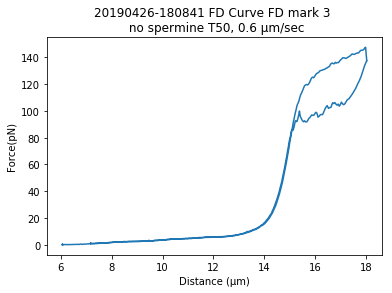

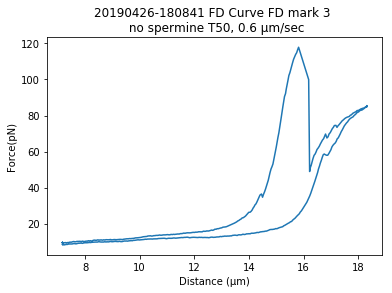

In [163]:
#plotting FD curves 
plt.figure()
force_data = file["Force LF"]["Force 1x"].data
distance_data = file["Distance"]["Distance 1"].data
plt.plot(distance_data, force_data)
plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("20190426-180841 FD Curve FD mark 3 \n no spermine T50, 0.6 µm/sec")

# print(file["Force LF"]["Force 1x"].sample_rate)
# print(file["Distance"]["Distance 1"].sample_rate)
# print(len(file["Force LF"]["Force 1x"].data))
# print(len(file["Force HF"]["Force 1x"].data))
# print(len(file["Distance"]["Distance 1"].data))
# print((len(file["Force HF"]["Force 1x"].data))/(len(file["Force LF"]["Force 1x"].data)))

plt.figure()

force_data = file1["Force LF"]["Force 1x"].data
distance_data = file1["Distance"]["Distance 1"].data
plt.plot(distance_data, force_data)
plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("20190426-180841 FD Curve FD mark 3 \n no spermine T50, 0.6 µm/sec")
# plt.savefig("20190426-180841 FD Curve FD mark 3 no spermine T50",  bbox_inches="tight")

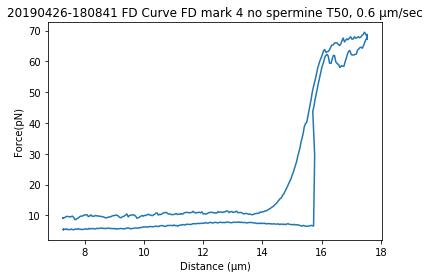

In [27]:
#with 1mM spermine
force_data = file2["Force LF"]["Force 1x"].data
distance_data = file2["Distance"]["Distance 1"].data
plt.plot(distance_data, force_data)
plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("20190426-180841 FD Curve FD mark 4 no spermine T50, 0.6 µm/sec")
plt.savefig("20190426-180841 FD Curve FD mark 4 no spermine T50")

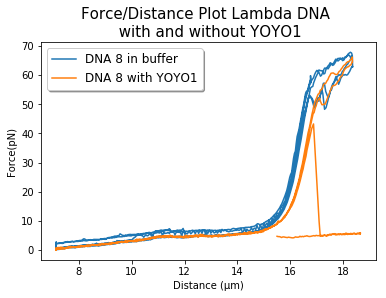

In [179]:
#both with and without 1mM spermine
fig, ax = plt.subplots()

force_data = file["Force LF"]["Force 1x"].data
force_data = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"].data
ax.plot(distance_data, force_data ,label='DNA 8 in buffer')

force_data1 = file1["Force LF"]["Force 1x"].data
force_data1 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"].data
ax.plot(distance_data1, force_data1 ,label='DNA 8 with YOYO1')

# force_data2 = file2["Force LF"]["Force 1x"].data
# force_data2_0 = force_data2 - min(force_data2)
# distance_data2 = file2["Distance"]["Distance 1"].data
# ax.plot(distance_data2, force_data2_0, label='mark 20-1mM spermine')

# force_data3 = file3["Force LF"]["Force 1x"].data
# force_data3_0 = force_data3 - min(force_data3)
# distance_data3 = file3["Distance"]["Distance 1"].data
# ax.plot(distance_data3, force_data3_0, label='mark 21-1mM spermine')

# force_data4 = file4["Force LF"]["Force 1x"].data
# force_data4_0 = force_data4 - min(force_data4)
# distance_data4 = file4["Distance"]["Distance 1"].data
# ax.plot(distance_data4, force_data4_0, label='mark 22-1mM spermine')

# force_data5 = file5["Force LF"]["Force 1x"].data
# force_data5_0 = force_data5 - min(force_data5)
# distance_data5 = file5["Distance"]["Distance 1"].data
# ax.plot(distance_data5, force_data5_0, label='mark 7-1mM spermine')

#print (min(force_data_0))

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("Force/Distance Plot Lambda DNA \n with and without YOYO1", fontsize = 15)
legend = ax.legend(loc='best', shadow=True, fontsize='large')
# plt.savefig("DNA 8 Force_Distance Lambda DNA plus and minus YOYO1.png", bbox_inches="tight")

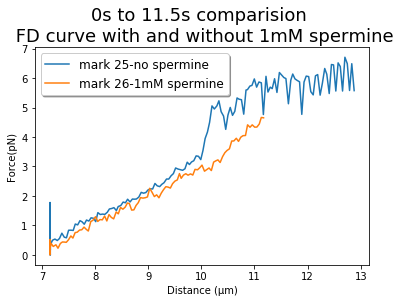

In [27]:
#at small distances
fig, ax = plt.subplots()

force_data = file["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data_0 = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data, force_data_0,label='mark 25-no spermine')

force_data1 = file1["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data1_0 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine')

# force_data2 = file2["Force LF"]["Force 1x"]['0s':'11.5s'].data
# force_data2_0 = force_data2 - min(force_data2)
# distance_data2 = file2["Distance"]["Distance 1"]['0s':'11.5s'].data
# ax.plot(distance_data2, force_data2_0, label='mark 27-1mM spermine')

# force_data3 = file3["Force LF"]["Force 1x"].data
# force_data3_0 = force_data3 - min(force_data3)
# distance_data3 = file3["Distance"]["Distance 1"].data
# ax.plot(distance_data3, force_data3_0, label='mark 21-1mM spermine')

# force_data4 = file4["Force LF"]["Force 1x"].data
# force_data4_0 = force_data4 - min(force_data4)
# distance_data4 = file4["Distance"]["Distance 1"].data
# ax.plot(distance_data4, force_data4_0, label='mark 22-1mM spermine')

# force_data5 = file5["Force LF"]["Force 1x"].data
# force_data5_0 = force_data5 - min(force_data5)
# distance_data5 = file5["Distance"]["Distance 1"].data
# ax.plot(distance_data5, force_data5_0, label='mark 7-1mM spermine')

#print (min(force_data_0))

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("0s to 11.5s comparision \n FD curve with and without 1mM spermine", fontsize = 18)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')

# plt.savefig("0s to 11.5s comparision FD curve with and without 1mM spermine.png", bbox_inches="tight")

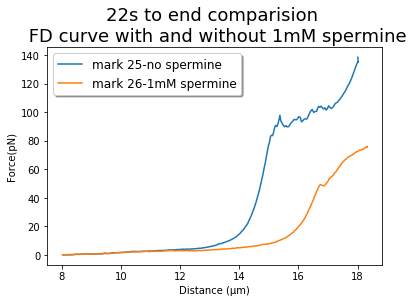

In [170]:
#at small distances
fig, ax = plt.subplots()

force_data = file["Force LF"]["Force 1x"]['22.5s':'40s'].data
force_data_0 = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"]['22.5s':'40s'].data
ax.plot(distance_data, force_data_0,label='mark 25-no spermine')

force_data1 = file1["Force LF"]["Force 1x"]['22.5s':'40s'].data
force_data1_0 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"]['22.5s':'40s'].data
ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine')

# force_data2 = file2["Force LF"]["Force 1x"]['22s':'40s'].data
# force_data2_0 = force_data2 - min(force_data2)
# distance_data2 = file2["Distance"]["Distance 1"]['22s':'40s'].data
# ax.plot(distance_data2, force_data2_0, label='mark 20-1mM spermine')

# force_data3 = file3["Force LF"]["Force 1x"].data
# force_data3_0 = force_data3 - min(force_data3)
# distance_data3 = file3["Distance"]["Distance 1"].data
# ax.plot(distance_data3, force_data3_0, label='mark 21-1mM spermine')

# force_data4 = file4["Force LF"]["Force 1x"].data
# force_data4_0 = force_data4 - min(force_data4)
# distance_data4 = file4["Distance"]["Distance 1"].data
# ax.plot(distance_data4, force_data4_0, label='mark 22-1mM spermine')

# force_data5 = file5["Force LF"]["Force 1x"].data
# force_data5_0 = force_data5 - min(force_data5)
# distance_data5 = file5["Distance"]["Distance 1"].data
# ax.plot(distance_data5, force_data5_0, label='mark 7-1mM spermine')

#print (min(force_data_0))

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("22s to end comparision \n FD curve with and without 1mM spermine", fontsize = 18)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')

# plt.savefig("22s to end comparision FD curve with and without 1mM spermine.png", bbox_inches="tight")

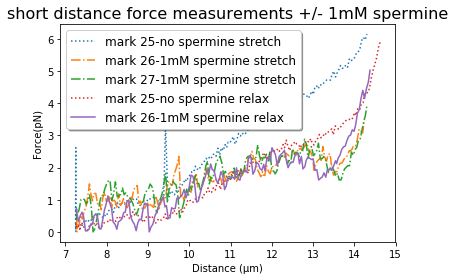

In [85]:
#at small distances
fig, ax = plt.subplots()

force_data = file["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data_0 = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data, force_data_0,label='mark 25-no spermine stretch', linestyle =  ':')

force_data1 = file1["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data1_0 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine stretch', linestyle = '-.')

force_data2 = file2["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data2_0 = force_data2 - min(force_data2)
distance_data2 = file2["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data2, force_data2_0, label='mark 27-1mM spermine stretch', linestyle = '-.')

force_data = file["Force LF"]["Force 1x"]['22.5s':'40s'].data
force_data_0 = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"]['22.5s':'40s'].data
ax.plot(distance_data, force_data_0,label='mark 25-no spermine relax', linestyle = ':')

force_data1 = file1["Force LF"]["Force 1x"]['23s':'40s'].data
force_data1_0 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"]['23s':'40s'].data
ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine relax')

# force_data3 = file3["Force LF"]["Force 1x"].data
# force_data3_0 = force_data3 - min(force_data3)
# distance_data3 = file3["Distance"]["Distance 1"].data
# ax.plot(distance_data3, force_data3_0, label='mark 21-1mM spermine')

# force_data4 = file4["Force LF"]["Force 1x"].data
# force_data4_0 = force_data4 - min(force_data4)
# distance_data4 = file4["Distance"]["Distance 1"].data
# ax.plot(distance_data4, force_data4_0, label='mark 22-1mM spermine')

# force_data5 = file5["Force LF"]["Force 1x"].data
# force_data5_0 = force_data5 - min(force_data5)
# distance_data5 = file5["Distance"]["Distance 1"].data
# ax.plot(distance_data5, force_data5_0, label='mark 7-1mM spermine')

#print (min(force_data_0))

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("short distance force measurements +/- 1mM spermine", fontsize = 16)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')

plt.savefig("short distance mark 25 to 27.png", bbox_inches="tight")

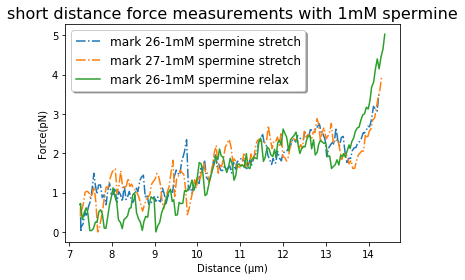

In [83]:
#at small distances
fig, ax = plt.subplots()

# force_data = file["Force LF"]["Force 1x"]['0s':'11.5s'].data
# force_data_0 = force_data - min(force_data)
# distance_data = file["Distance"]["Distance 1"]['0s':'11.5s'].data
# ax.plot(distance_data, force_data_0,label='mark 25-no spermine stretch', linestyle =  ':')

force_data1 = file1["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data1_0 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine stretch', linestyle = '-.')

force_data2 = file2["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data2_0 = force_data2 - min(force_data2)
distance_data2 = file2["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data2, force_data2_0, label='mark 27-1mM spermine stretch', linestyle = '-.')

# force_data = file["Force LF"]["Force 1x"]['22.5s':'40s'].data
# force_data_0 = force_data - min(force_data)
# distance_data = file["Distance"]["Distance 1"]['22.5s':'40s'].data
# ax.plot(distance_data, force_data_0,label='mark 25-no spermine relax', linestyle = ':')

force_data1 = file1["Force LF"]["Force 1x"]['23s':'40s'].data
force_data1_0 = force_data1 - min(force_data1)
distance_data1 = file1["Distance"]["Distance 1"]['23s':'40s'].data
ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine relax')

# force_data3 = file3["Force LF"]["Force 1x"].data
# force_data3_0 = force_data3 - min(force_data3)
# distance_data3 = file3["Distance"]["Distance 1"].data
# ax.plot(distance_data3, force_data3_0, label='mark 21-1mM spermine')

# force_data4 = file4["Force LF"]["Force 1x"].data
# force_data4_0 = force_data4 - min(force_data4)
# distance_data4 = file4["Distance"]["Distance 1"].data
# ax.plot(distance_data4, force_data4_0, label='mark 22-1mM spermine')

# force_data5 = file5["Force LF"]["Force 1x"].data
# force_data5_0 = force_data5 - min(force_data5)
# distance_data5 = file5["Distance"]["Distance 1"].data
# ax.plot(distance_data5, force_data5_0, label='mark 7-1mM spermine')

#print (min(force_data_0))

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("short distance force measurements with 1mM spermine", fontsize = 16)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')

plt.savefig("1mM Spermine short distance mark 25 to 27.png", bbox_inches="tight")

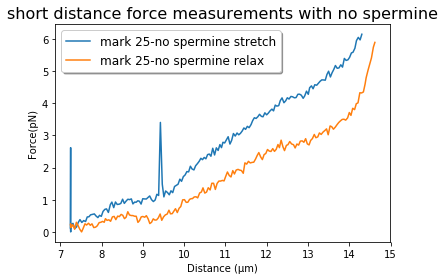

In [106]:
#at small distances
fig, ax = plt.subplots()

force_data = file["Force LF"]["Force 1x"]['0s':'11.5s'].data
force_data_0 = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"]['0s':'11.5s'].data
ax.plot(distance_data, force_data_0,label='mark 25-no spermine stretch')

# force_data1 = file1["Force LF"]["Force 1x"]['0s':'11.5s'].data
# force_data1_0 = force_data1 - min(force_data1)
# distance_data1 = file1["Distance"]["Distance 1"]['0s':'11.5s'].data
# ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine stretch', linestyle = '-.')

# force_data2 = file2["Force LF"]["Force 1x"]['0s':'11.5s'].data
# force_data2_0 = force_data2 - min(force_data2)
# distance_data2 = file2["Distance"]["Distance 1"]['0s':'11.5s'].data
# ax.plot(distance_data2, force_data2_0, label='mark 27-1mM spermine stretch', linestyle = '-.')

force_data = file["Force LF"]["Force 1x"]['22.5s':'40s'].data
force_data_0 = force_data - min(force_data)
distance_data = file["Distance"]["Distance 1"]['22.5s':'40s'].data
ax.plot(distance_data, force_data_0,label='mark 25-no spermine relax')

# force_data1 = file1["Force LF"]["Force 1x"]['23s':'40s'].data
# force_data1_0 = force_data1 - min(force_data1)
# distance_data1 = file1["Distance"]["Distance 1"]['23s':'40s'].data
# ax.plot(distance_data1, force_data1_0,label='mark 26-1mM spermine relax')

# force_data3 = file3["Force LF"]["Force 1x"].data
# force_data3_0 = force_data3 - min(force_data3)
# distance_data3 = file3["Distance"]["Distance 1"].data
# ax.plot(distance_data3, force_data3_0, label='mark 21-1mM spermine')

# force_data4 = file4["Force LF"]["Force 1x"].data
# force_data4_0 = force_data4 - min(force_data4)
# distance_data4 = file4["Distance"]["Distance 1"].data
# ax.plot(distance_data4, force_data4_0, label='mark 22-1mM spermine')

# force_data5 = file5["Force LF"]["Force 1x"].data
# force_data5_0 = force_data5 - min(force_data5)
# distance_data5 = file5["Distance"]["Distance 1"].data
# ax.plot(distance_data5, force_data5_0, label='mark 7-1mM spermine')

#print (min(force_data_0))

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("short distance force measurements with no spermine", fontsize = 16)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')

plt.savefig("No Spermine short distance mark 25 to 27.png", bbox_inches="tight")

In [87]:
from numpy import arange,array,ones#,random,linalg
from pylab import plot,show
from scipy import stats

r_value 0.9282926153552962
p_value 4.3581497167858376e-20
standard deviation 0.026896066581261667
MSD = 0.0018577505422614985
MSD2 = 0.09682776290657819
MSD_large = 0.1700304810380248


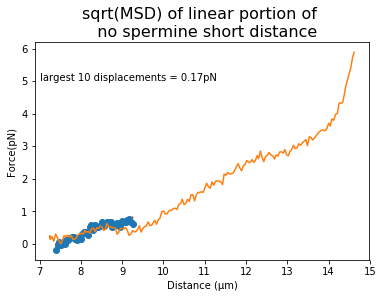

In [167]:
xi = file["Distance"]["Distance 1"]['.5s':'3.5s'].data
y = file["Force LF"]["Force 1x"]['.5s':'3.5s'].data

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print ('r_value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)

line = slope*xi+intercept
plot(xi,line,'r-',xi,y,'o')
plot(distance_data, force_data_0)


r = np.sqrt(xi**2 + y**2)
diff = np.diff(r) #this calculates r(t + dt) - r(t)
diff_sq = diff**2
MSD = np.mean(diff_sq)
print ('MSD =', MSD)


np_square = np.square(y-line)
MSD2 = np.sum(np_square)/len(y)
MSD2 = np.sqrt(MSD2)
print ('MSD2 =', MSD2)
newList = sorted(np_square, reverse=True)
newList2 = newList[0:10]
# print(newList2)
MSD_large = np.sum(newList2)/len(newList2)
MSD_large = np.sqrt(MSD_large)
print ('MSD_large =', MSD_large)

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("sqrt(MSD) of linear portion of \n  no spermine short distance", fontsize = 16)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')
plt.text(7,5,"largest 10 displacements = 0.17pN")

plt.savefig("sqrtMSD of linear portion of no spermine.png", bbox_inches="tight")

r_value -0.05531001903623455
p_value 0.7181992772825411
standard deviation 0.06266677050703788
MSD = 0.0020979805254731816
MSD2 = 0.22130709490292366
MSD3 = 0.22130709490292366
MSD_large = 0.39522627860377474


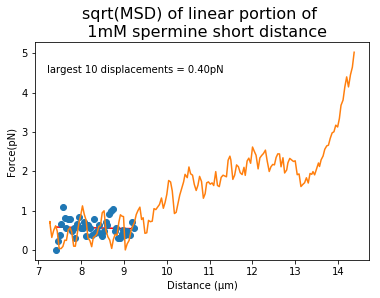

In [168]:
xi = file1["Distance"]["Distance 1"]['.5s':'3.5s'].data
# y1 = file1["Force LF"]["Force 1x"].data
y = file1["Force LF"]["Force 1x"]['.5s':'3.5s'].data
y= y- min(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print ('r_value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)


line = slope*xi+intercept
# line = line-min(line)
# y= y- min(y)
plot(xi,line,'r-',xi,y,'o')
plot(distance_data1, force_data1_0)
r = np.sqrt(xi**2 + y**2)
diff = np.diff(r) #this calculates r(t + dt) - r(t)
diff_sq = diff**2
MSD = np.mean(diff_sq)
print ('MSD =', MSD)

np_square = np.square(y-line)
MSD2 = np.sum(np_square)/len(y)
MSD2 = np.sqrt(MSD2)
print ('MSD2 =', MSD2)
# I can take the 10 greatest deviation from the line and find average distance, and compare two cases
# this will just give me what I am looking for the greatest deviation on average from a straight line
np_square = np.square(y-line)
MSD3 = np.sum(np_square)/len(y)
MSD3 = np.sqrt(MSD3)
print ('MSD3 =', MSD3)

newList = sorted(np_square, reverse=True)
newList2 = newList[0:10]
# print(newList2)
MSD_large = np.sum(newList2)/len(newList2)
MSD_large = np.sqrt(MSD_large)
print ('MSD_large =', MSD_large)

plt.xlabel("Distance (µm)")
plt.ylabel("Force(pN)")
plt.title("sqrt(MSD) of linear portion of \n  1mM spermine short distance", fontsize = 16)
# plt.title("multiple DNAs not useful data", fontsize = 18)
legend = ax.legend(loc='best', shadow=True, fontsize='large')
plt.text(7.2,4.5,"largest 10 displacements = 0.40pN")

plt.savefig("sqrtMSD of linear portion of 1mM spermine.png", bbox_inches="tight")

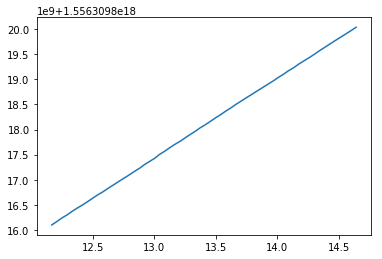

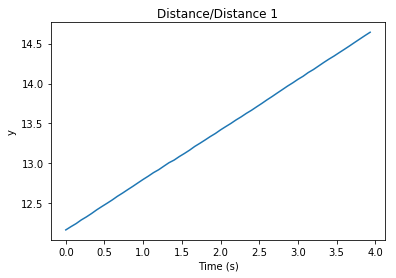

In [88]:
distance_data = file["Distance"]["Distance 1"]['8s':'12s'].data
distance_time = file["Distance"]["Distance 1"]['8s':'12s'].timestamps
# print(distance_data)
# print(distance_time)
plt.plot(distance_data, distance_time)
plt.figure()

file["Distance"]["Distance 1"]['8s':'12s'].plot()


In [58]:
# Calculate the rate that the traps are moving as a test that what was inputted during the experiment was executed accuratly 
distance_data = file["Distance"]["Distance 1"]['8s':'12s'].data
distance_time = file["Distance"]["Distance 1"]['8s':'12s'].timestamps
slope, intercept, r_value, p_value, std_err = stats.linregress(distance_data,distance_time)
# Print the distance per second time as a rate 
rate_var = print (1/(slope/1000000000) , "um/sec")
rate_var

0.6279251474447115 um/sec


By default, the FD channel pair is `downsampled_force2` and `distance1`. This assumes that the force extension was done by moving trap 1, which is the most common. In that situation the force measured by trap 2 is more precise because that trap is static. The channels can be switched with the following code:

In [ ]:
# alt_fd = fd.with_channels(force='1x', distance='2')
# alt_fd.plot_scatter()

## or as quick one-liner for plotting
#fd.with_channels(force='2y', distance='2').plot_scatter()

The raw data can be accessed as well:

In [79]:
##  Access the raw data: default force and distance channels
#  force = fd.f
#  distance = fd.d

##  Access the raw data: specific channels
#  force = fd.downsampled_force1y
#  distance = fd.distance2

##  Plot manually: FD curve
#  plt.scatter(distance.data, force.data)
##  Plot manually: force timetrace
#  plt.plot(force.timestamps, force.data)

In [ ]:
#downsampling the rate of data collection
sampling_rate = force1x.sample_rate
print(sampling_rate)
final_sampling_rate = 100 #Hz
force1x_100Hz = force1x.downsampled_by(int( sampling_rate / final_sampling_rate ))
sampling_rate_100Hz = force1x_100Hz.sample_rate
print(sampling_rate_100Hz)
force1x['0s':'9s'].plot()
force1x_100Hz['0s':'9s'].plot()